#code to get coefficients 

In [2]:
import numpy as np

# coefficient function takes three inputs ---> x is independent variable, y is dependent variable in linear regression, n is degree of polynomial
# coefficient function returns the coefficients of nth degree polynomial 

def coefficients (n, x, y): 
    x = [float(item) for item in x]
    y = [float(item) for item in y]
    row = []
    p =0
    for j in range((n+1)*(n+1)):
        ele =0
        for i in range(len(x)):
            ele += pow(x[i], p)
        p = p+1
        row.append(ele)
    arr = np.empty((0,n+1), int)
    for i in range(n+1):
        arr = np.vstack((arr, row[i:i+n+1]))
     
    arr2 = np.empty((0,1), int)
    
    p1 = 0
    for i in range(n+1): 
        sum =0
        for j in range(len(x)): 
            sum+= y[j] * pow(x[j], p1)
        arr2 = np.vstack((arr2, sum))
        p1 = p1+1
    #print(arr2)

    arr_inv = np.linalg.inv(arr)
    beta = np.dot(arr_inv, arr2)
    return beta





year = [2004, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
revenue = [61.2, 58.3, 67.1, 69.2, 68.9, 83.5, 89.1, 80, 92.3, 93, 97 ]

man =coefficients(4, year, revenue)
print(man)

[[-3.34627020e+07]
 [ 6.45509004e+04]
 [-4.64827512e+01]
 [ 1.48011257e-02]
 [-1.75729424e-06]]


# code to predict y  

In [4]:

# get_y functions takes three inputs ----> dependent variable list, coefficients calculated, degree of polynomial
# get_y returns ------> list of predicted values i.e dependent variable

def get_y (x, beta, n):
    y = []
    for i in range(len(x)):
        sum =0
        p =0
        for j in range(n+1):
            sum += beta[j][0] * pow(x[i], p)
            p = p+1
        y.append(sum)
    return y



betaa =coefficients(1,year , revenue)


print(get_y (year, betaa,1 ))

[52.799999999166175, 65.91999999849304, 69.19999999832453, 72.47999999815693, 75.75999999798842, 79.0399999978199, 82.3199999976514, 85.59999999748288, 88.87999999731528, 92.15999999714677, 95.43999999697826]


# function to find validation error

In [8]:
# validation error takes input ------> predicted values list and actual dependent values list 
# validation error returns ---------> validation error

def validation_error(y_predicted, y_real):
    validation_error = 0
    
    for i in range(len(y_predicted)):
        out = y_predicted[i] - y_real[i] 
        out = out*out 
        validation_error+=out
    return validation_error

# get graph 

validation error:226.98275611671735


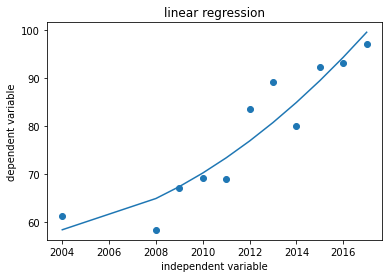

validation error:302.90800000000223


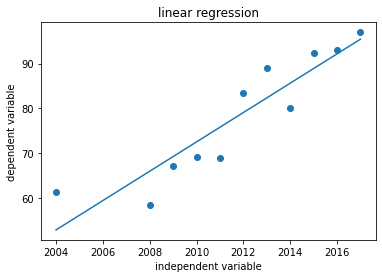

302.90800000000223

In [18]:
import matplotlib.pyplot as plt 
# get_graph takes input -----> x is independent list, y is dependent list, n is degree of linear regression model 
# get_graph returns plot in which scattered points are actual given dependent points and curve is predicted values 
def get_graph (x, y, n):
    beta = coefficients(n, x, y, )
    #print(beta)
    predicted_y = get_y (x, beta, n)
    #print(len(train_x))
    #print(len(predicted_y))
    error = validation_error(predicted_y, y)
    print('validation error:' + str(error))
    plt.plot(x, predicted_y) 
    plt.scatter(x, y)
    plt.xlabel('independent variable') 
    plt.ylabel('dependent variable') 
    plt.title('linear regression') 
    plt.show() 
    return error

get_graph(year, revenue, 2, )
get_graph(year, revenue,1)
